In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            60 non-null     object 
 1   CNG Only         60 non-null     object 
 2   DIESEL           60 non-null     object 
 3   Diesel/Hybrid    57 non-null     object 
 4   Electric (BOV)   60 non-null     object 
 5   LPG Only         60 non-null     object 
 6   Petrol           60 non-null     object 
 7   Petrol/CNG       60 non-null     object 
 8   Petrol/Hybrid    60 non-null     object 
 9   Petrol/LPG       60 non-null     object 
 10  Ethanol          22 non-null     float64
 11  Not Applicable   60 non-null     object 
dtypes: float64(1), object(11)
memory usage: 5.8+ KB


In [4]:
df.head()

,Month,CNG Only,DIESEL,Diesel/Hybrid,Electric (BOV),LPG Only,Petrol,Petrol/CNG,Petrol/Hybrid,Petrol/LPG,Ethanol,Not Applicable
0,Apr-17,"1,825","1,93,689","3,412","5,063",89,"14,32,174","16,879",108,"4,941",1.0,"6,784"
1,May-17,"1,918","1,82,173","4,172","7,080",160,"15,10,907","17,968",88,"5,198",1.0,"7,403"
2,Jun-17,"2,352","1,94,894","4,717","7,508",218,"14,23,800","18,768",123,"6,000",1.0,"6,784"
3,Jul-17,"2,081","1,96,529","4,161","9,031",521,"13,09,851","18,069",30,"5,427",1.0,"6,897"
4,Aug-17,"1,532","1,85,968","3,201","9,174",643,"12,41,005","20,652",31,"5,891",NaN,"5,359"


In [5]:
df.columns

Index(['Month ', 'CNG Only ', 'DIESEL ', 'Diesel/Hybrid ', 'Electric (BOV) ',
       'LPG Only ', 'Petrol ', 'Petrol/CNG ', 'Petrol/Hybrid ', 'Petrol/LPG ',
       'Ethanol ', 'Not Applicable '],
      dtype='object')

Drop few columns that are not important for our study such as VIN,POSTAL CODE,BASE MSRP,LEGISLATICE DISTRICT,DOL VEHICLE ID,ELECTIRIC UTILITY,2020 CENSUS TRACT

In [6]:
df=df.drop(columns=['Not Applicable '], axis=1)

In [7]:
df.head()

,Month,CNG Only,DIESEL,Diesel/Hybrid,Electric (BOV),LPG Only,Petrol,Petrol/CNG,Petrol/Hybrid,Petrol/LPG,Ethanol
0,Apr-17,"1,825","1,93,689","3,412","5,063",89,"14,32,174","16,879",108,"4,941",1.0
1,May-17,"1,918","1,82,173","4,172","7,080",160,"15,10,907","17,968",88,"5,198",1.0
2,Jun-17,"2,352","1,94,894","4,717","7,508",218,"14,23,800","18,768",123,"6,000",1.0
3,Jul-17,"2,081","1,96,529","4,161","9,031",521,"13,09,851","18,069",30,"5,427",1.0
4,Aug-17,"1,532","1,85,968","3,201","9,174",643,"12,41,005","20,652",31,"5,891",NaN


In [8]:
df.shape

(60, 11)

In [9]:
df.isna().sum()

Month               0
CNG Only            0
DIESEL              0
Diesel/Hybrid       3
Electric (BOV)      0
LPG Only            0
Petrol              0
Petrol/CNG          0
Petrol/Hybrid       0
Petrol/LPG          0
Ethanol            38
dtype: int64

A very few data points are missing so we can remove them 

In [10]:
df.dropna(inplace= True)

In [11]:
df.describe()

,Ethanol
count,22.000000
mean,2.590909
std,2.905808
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,11.000000


In [12]:
fuel_columns = ['CNG Only ', 'DIESEL ', 'Diesel/Hybrid ', 'Electric (BOV) ','LPG Only ', 'Petrol ', 'Petrol/CNG ', 'Petrol/Hybrid ', 'Petrol/LPG ' ]
for col in fuel_columns:
    df[col] = df[col].str.replace(',', '').astype(int)
df[fuel_columns] = df[fuel_columns].astype(int)


In [13]:
df.describe()

,CNG Only,DIESEL,Diesel/Hybrid,Electric (BOV),LPG Only,Petrol,Petrol/CNG,Petrol/Hybrid,Petrol/LPG,Ethanol
count,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000,22.000000,22.000000
mean,3373.727273,204843.181818,3268.545455,13800.954545,380.727273,1.457841e+06,26864.000000,3108.363636,7034.318182,2.590909
std,4803.051611,34353.180311,1782.802815,14550.728421,264.332976,2.013335e+05,7559.876637,3081.381779,2551.220331,2.905808
min,1787.000000,78836.000000,1.000000,5063.000000,89.000000,8.921980e+05,7268.000000,19.000000,524.000000,1.000000
25%,2073.500000,193990.250000,1683.000000,8897.000000,216.500000,1.410898e+06,23386.000000,78.250000,5969.250000,1.000000
50%,2342.000000,209564.000000,4166.500000,10434.500000,271.500000,1.468148e+06,28115.000000,2528.000000,7742.500000,1.000000
75%,2660.250000,228475.500000,4524.750000,14327.500000,473.750000,1.529362e+06,31429.500000,6079.000000,8964.250000,2.000000
max,24807.000000,244725.000000,5525.000000,77199.000000,1276.000000,1.898134e+06,37337.000000,8072.000000,9891.000000,11.000000


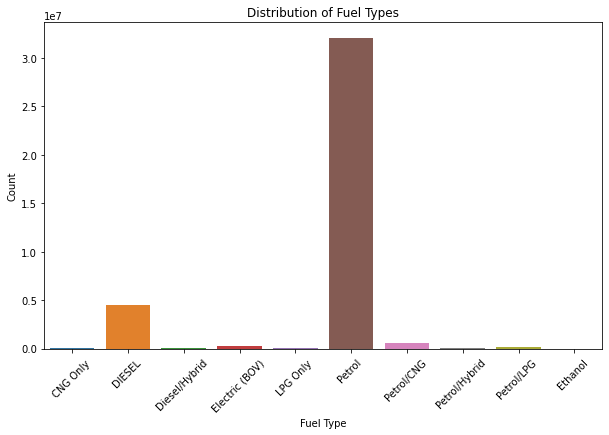

In [14]:
fuel_counts = df.iloc[:, 1:].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=fuel_counts.index, y=fuel_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Distribution of Fuel Types')
plt.show()


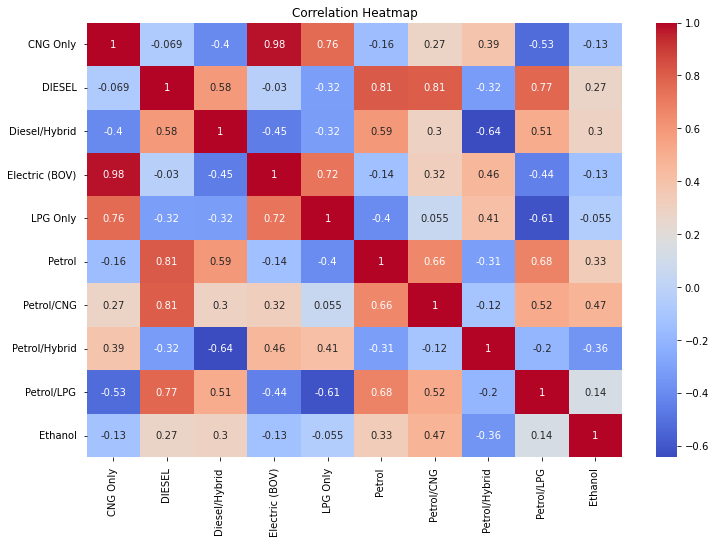

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


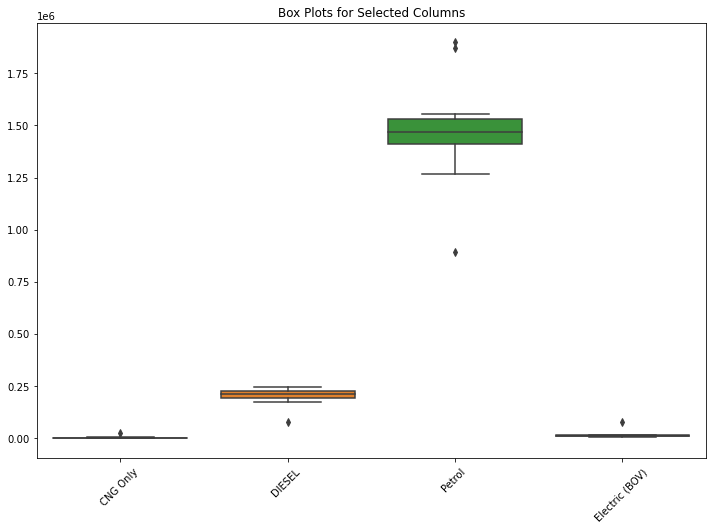

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['CNG Only ', 'DIESEL ', 'Petrol ', 'Electric (BOV) ']])
plt.xticks(rotation=45)
plt.title('Box Plots for Selected Columns')
plt.show()


<Figure size 7200x7200 with 0 Axes>

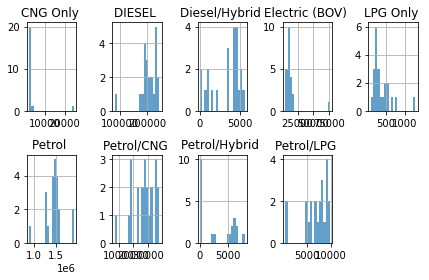

In [17]:
# Create histograms for fuel type columns
plt.figure(figsize=(100,100))
df[fuel_columns].hist(alpha=0.7, bins=20, layout=(2, 5))
plt.tight_layout()
plt.show()


<Figure size 864x576 with 0 Axes>

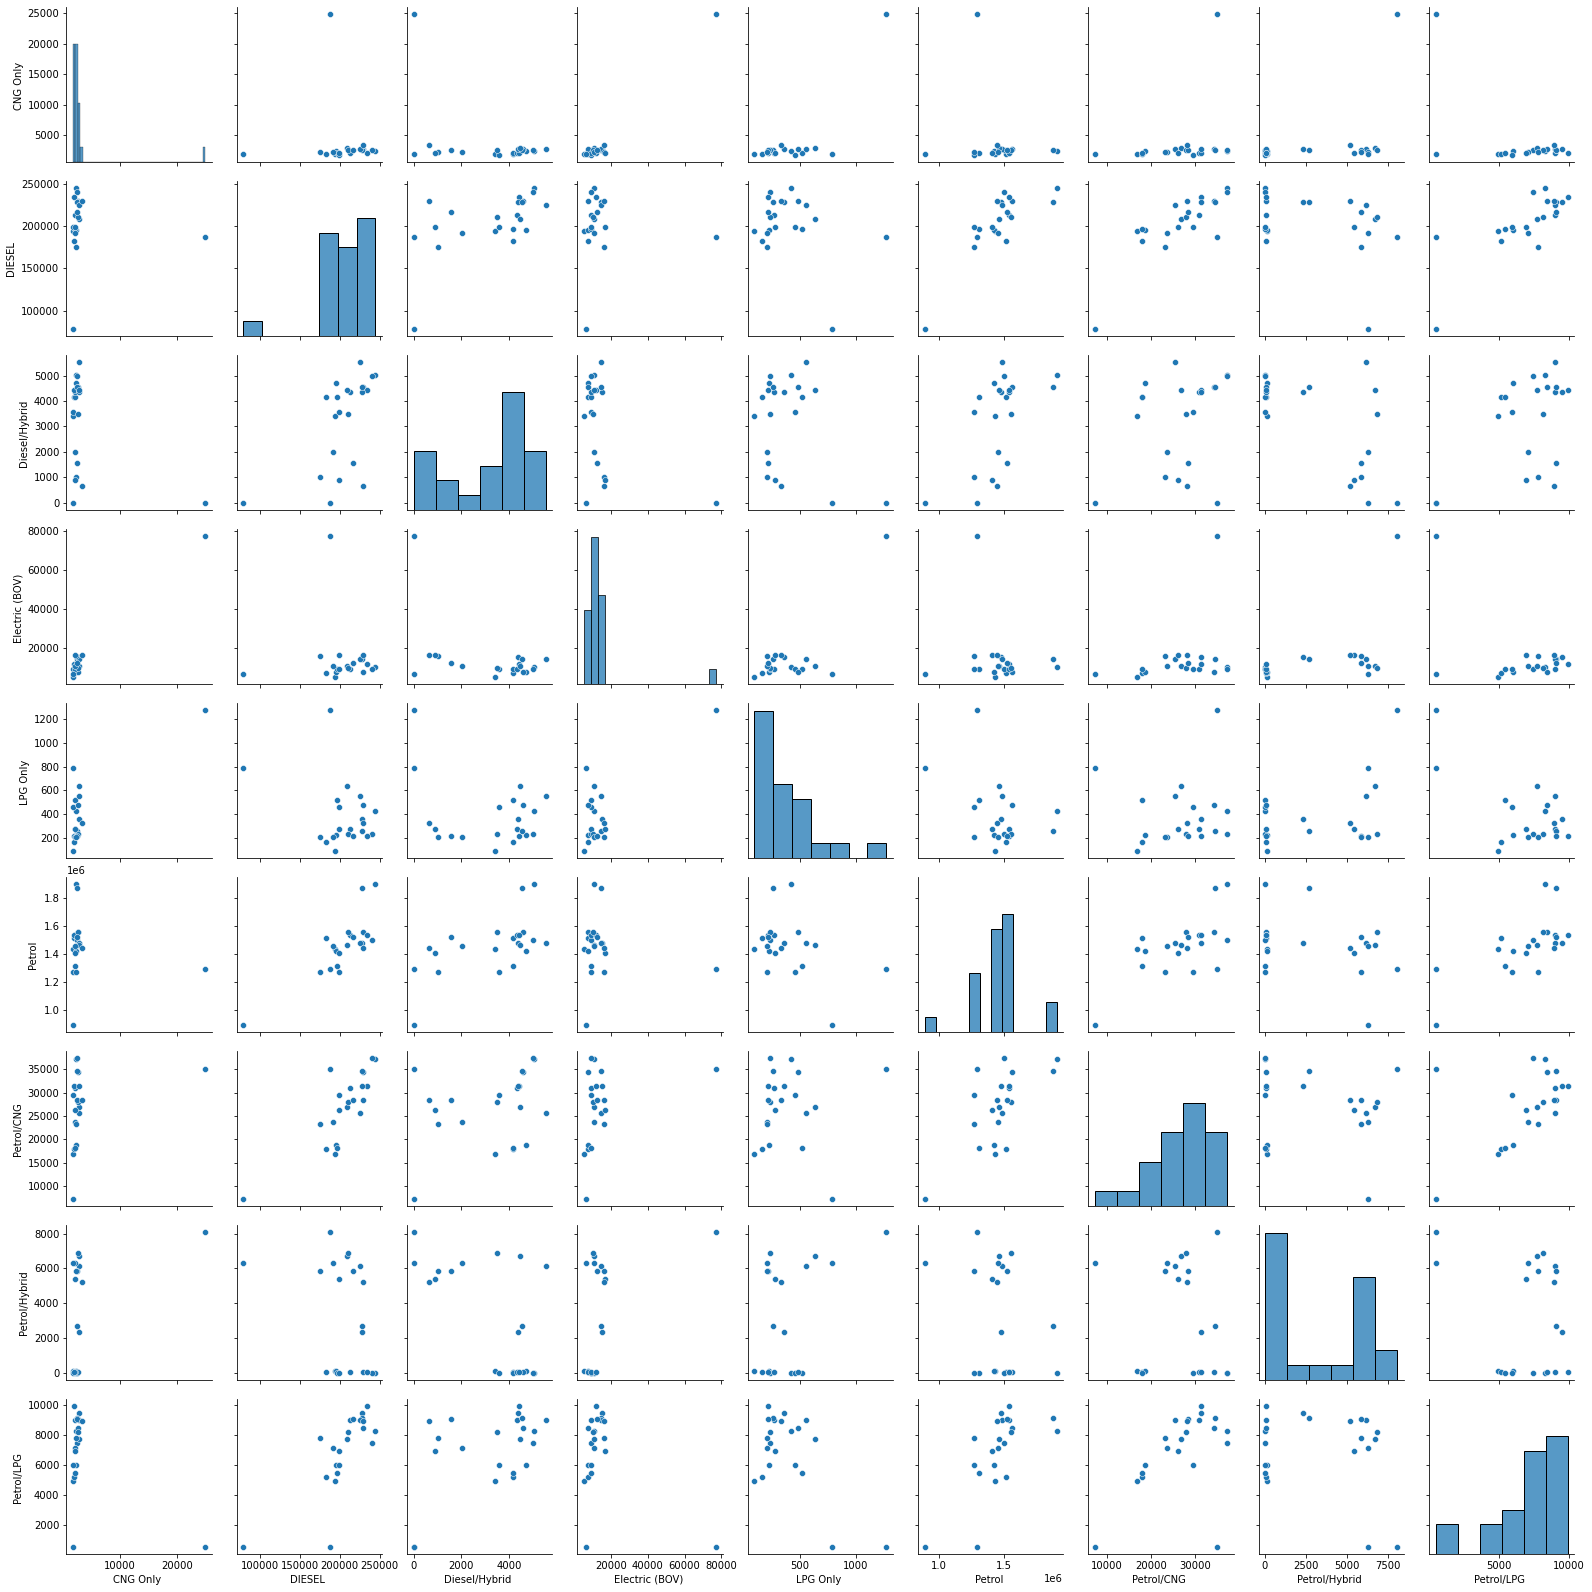

In [18]:
# Create a pair plot for fuel type columns
plt.figure(figsize=(12, 8))
sns.pairplot(df[fuel_columns])
plt.show()


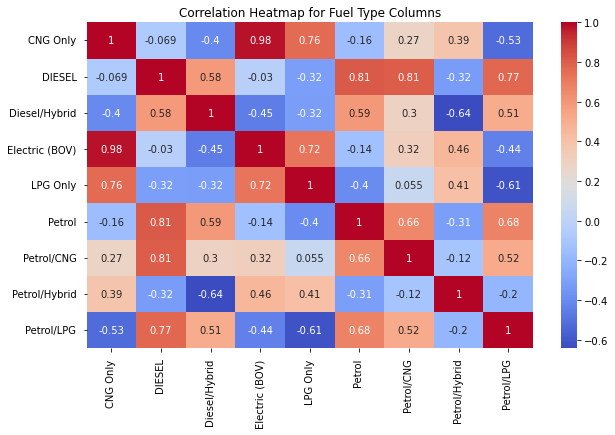

In [19]:
# Create a heatmap for fuel type columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[fuel_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Fuel Type Columns')
plt.show()


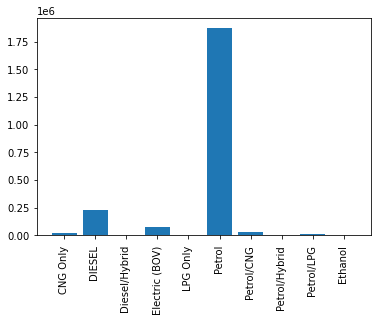

In [20]:
plt.bar(df.columns[1:],df[-12:].max()[1:])
plt.xticks(rotation=90)
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
segmentation_columns = ['CNG Only ', 'DIESEL ', 'Diesel/Hybrid ', 'Electric (BOV) ',
                        'LPG Only ', 'Petrol ', 'Petrol/CNG ', 'Petrol/Hybrid ', 'Petrol/LPG ', 'Ethanol ']

# Perform data preprocessing
X = df[segmentation_columns]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction


In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Determine optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph


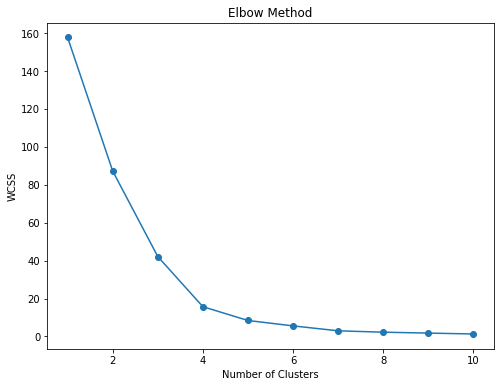

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters


In [24]:
n_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_pca)

# Add cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

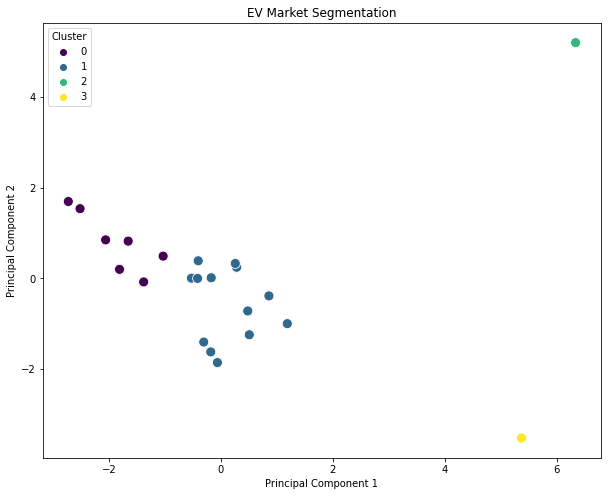

            CNG Only         DIESEL   Diesel/Hybrid   Electric (BOV)   \
Cluster                                                                 
0         2431.714286  231180.571429     4606.714286     10909.285714   
1         2350.923077  201678.923077     3050.538462     11065.153846   
2        24807.000000  187624.000000        3.000000     77199.000000   
3         1831.000000   78836.000000        1.000000      6210.000000   

           LPG Only        Petrol    Petrol/CNG   Petrol/Hybrid   Petrol/LPG   \
Cluster                                                                         
0         318.428571  1.623491e+06  33891.714286      760.714286  8795.714286   
1         314.230769  1.425229e+06  23964.076923     3744.230769  7086.538462   
2        1276.000000  1.287888e+06  34965.000000     8072.000000   524.000000   
3         786.000000  8.921980e+05   7268.000000     6312.000000   536.000000   

         Ethanol   
Cluster            
0        4.142857  
1        2.000

In [25]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.title('EV Market Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Explore the characteristics of each cluster
cluster_characteristics = df.groupby('Cluster')[segmentation_columns].mean()
print(cluster_characteristics)